# Modeling and Simulation in Python

Elk and Wolves

David Tarazi

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Code

In [2]:
def makeSystem(alpha, beta, gamma, delta, t0, tEnd):
    system = System(alpha = alpha, beta = beta, gamma = gamma, delta = delta, t0 = t0, tEnd = tEnd)
    return system
def makeInit(x, y):
    init = State(X = x, Y = y)
    return init

In [3]:
system = makeSystem(0.05, 0.1, 0.1, 0.1, 0, 200)
init = makeInit(1, 1)

,values
X,1
Y,1


In [4]:
def updateFunc(init, system):
    x, y = init
    
    deltaElk = ((system.alpha * x) - (system.beta * x * y))
    deltaWolves = ((system.delta * x * y) - (system.gamma * y))

    x += deltaElk
    y += deltaWolves
    
    return State(X = x, Y = y)

In [5]:
def runSimulation(system, updateFunc):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, tEnd):
        frame.row[t+1] = updateFunc(frame.row[t], system)
    
    return frame

In [6]:
def plotData(elk, wolves):
    plot(elk, "--", label = "elk")
    plot(wolves, ":", label = "wolves")
    decorate(xlabel='Time (days)',
             ylabel='Population')

0.0             1
1.0          0.95
2.0        0.9025
3.0      0.857826
4.0      0.816196
5.0       0.77773
6.0      0.742464
7.0      0.710372
8.0      0.681372
9.0      0.655348
10.0      0.63216
11.0     0.611652
12.0     0.593665
13.0     0.578037
14.0     0.564613
15.0     0.553246
16.0     0.543797
17.0     0.536139
18.0     0.530156
19.0     0.525744
20.0     0.522809
21.0     0.521269
22.0      0.52105
23.0     0.522089
24.0     0.524331
25.0     0.527727
26.0     0.532238
27.0      0.53783
28.0     0.544474
29.0     0.552147
           ...   
171.0     2.03592
172.0     2.05316
173.0     2.06171
174.0     2.06035
175.0     2.04791
176.0     2.02337
177.0     1.98599
178.0     1.93538
179.0     1.87165
180.0      1.7955
181.0     1.70826
182.0     1.61187
183.0     1.50876
184.0     1.40172
185.0     1.29366
186.0     1.18732
187.0     1.08511
188.0    0.988934
189.0    0.900116
190.0    0.819414
191.0    0.747091
192.0    0.683016
193.0    0.626782
194.0    0.577807
195.0    0

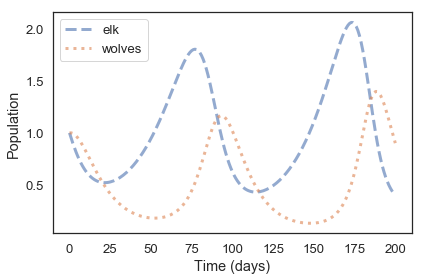

In [7]:
data = runSimulation(system, updateFunc)
print(data.X)
print(data.Y)
plotData(data.X, data.Y)